# DSBDAL Assignment 04 - Data Visualization 1  
    

1.   Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
2.   Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.



The objective is to predict the value of prices of the house using the given features.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

# Pre Processsing

## Structure of Dataset

survival	Survival	0 = No, 1 = Yes
pclass      Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
ds = pd.read_csv('/content/drive/My Drive/DSBDL/Assignment4/titanic.csv')
ds.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
ds.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [5]:
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Correcting data-types

In [6]:
ds = ds.astype( {
    "Name": "string" ,
    "Sex": "string" ,
    "Ticket": "string"  ,
    "Cabin": "string"  ,
    "Embarked": "string"  ,
} )
ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            string
Sex             string
Age            float64
SibSp            int64
Parch            int64
Ticket          string
Fare           float64
Cabin           string
Embarked        string
dtype: object

In [7]:
# Check number of missing values
ds.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

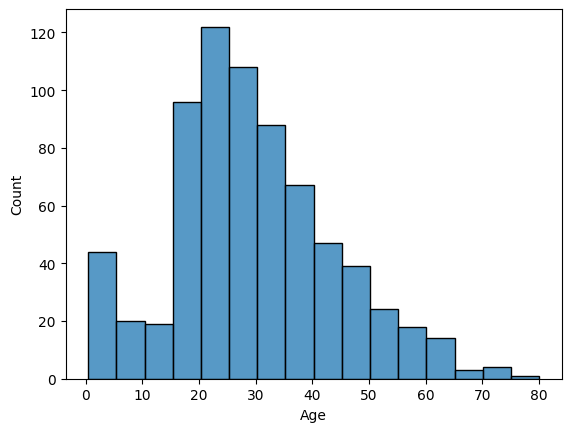

In [8]:
# Check statistics of columns with missing values
print( ds[ "Age" ].describe() )
sns.histplot( data=ds , x="Age" , bins=16 )

# Exploratory Data Analysis
## Visualization of each feature with target class Survived

Observation: Pclass = 3 (third class) passengers survived the least and Pclass = 1 (first class) passengers survived the most


<Axes: xlabel='Pclass', ylabel='count'>

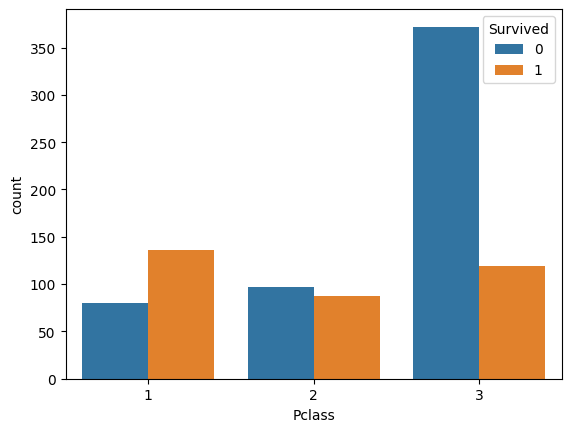

In [9]:
# PClass vs Survived
sns.countplot( data=ds , x="Pclass" , hue="Survived" )

Observation: Males survived least, females the most

<Axes: xlabel='Sex', ylabel='count'>

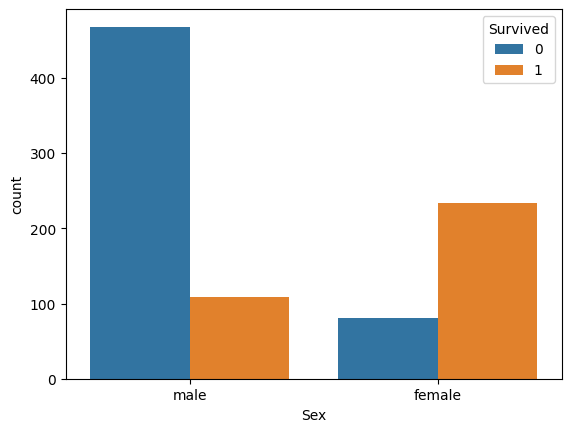

In [10]:
# Sex vs. Survived
sns.countplot( data=ds , x="Sex" , hue="Survived" )



Observation: The distribution of the age of passengers who survived appears to have a smaller median than that of the passengers who didn't survived, indicating younger passengers survived most



<Axes: xlabel='Survived', ylabel='Age'>

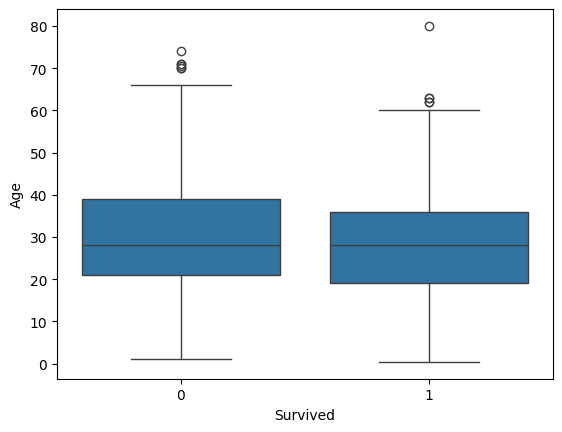

In [11]:
# Age vs. Survived
sns.boxplot( data=ds , x="Survived" , y="Age" )

Observation: Most passengers which survived or didn't survive embarked the Titanic from Southampton

<Axes: xlabel='Embarked', ylabel='count'>

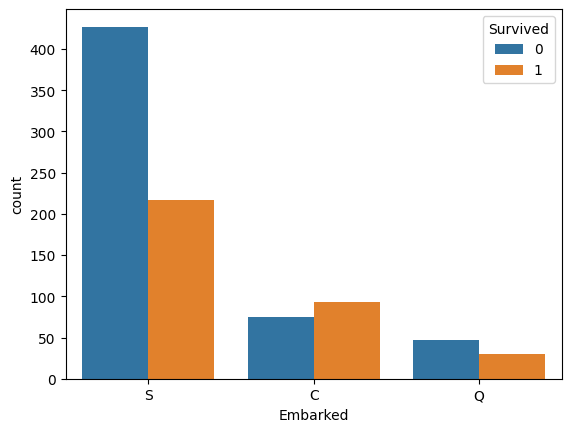

In [12]:
# Embarked vs. Survived
sns.countplot( data=ds , x="Embarked" , hue="Survived" )

Observation: As first class passengers survived the most, passengers with higher fare survived, assuming the fact that first-class had a higher fare than other classes

<Axes: xlabel='Survived', ylabel='Fare'>

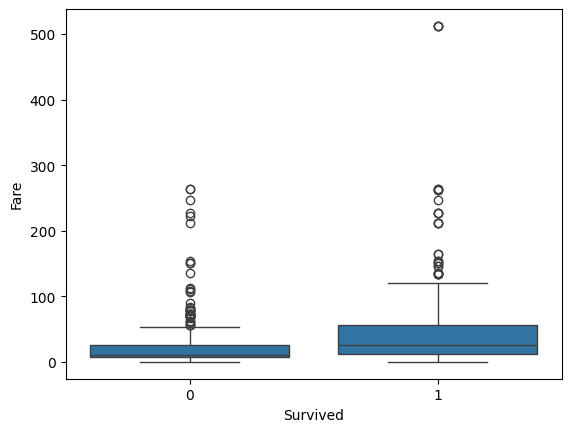

In [13]:
# Fare vs. Survived
sns.boxplot( data=ds , x="Survived" , y="Fare" )

<Axes: xlabel='SibSp', ylabel='count'>

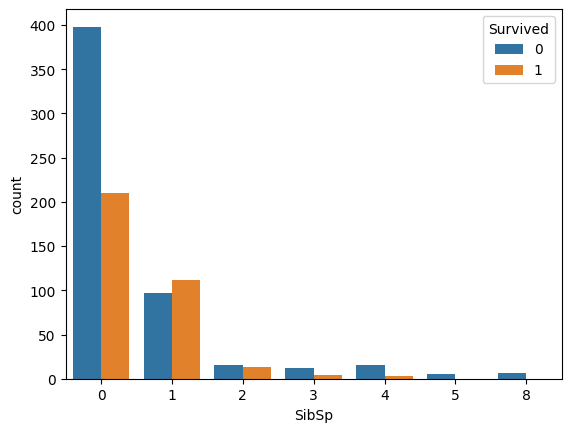

In [14]:
sns.countplot( data=ds , x="SibSp" , hue="Survived" )

<Axes: xlabel='Parch', ylabel='count'>

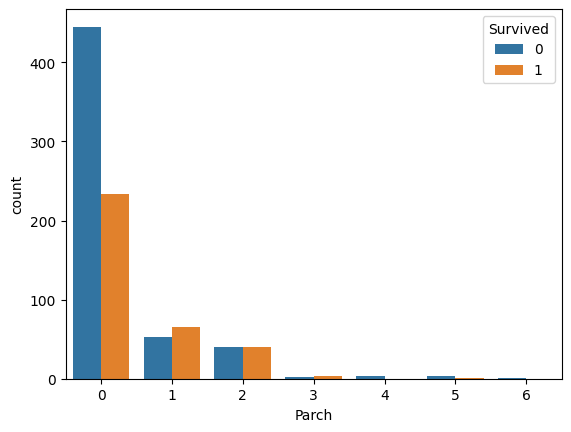

In [15]:
# Parch vs. Survived
sns.countplot( data=ds , x="Parch" , hue="Survived" )


<Axes: xlabel='Fare', ylabel='Count'>

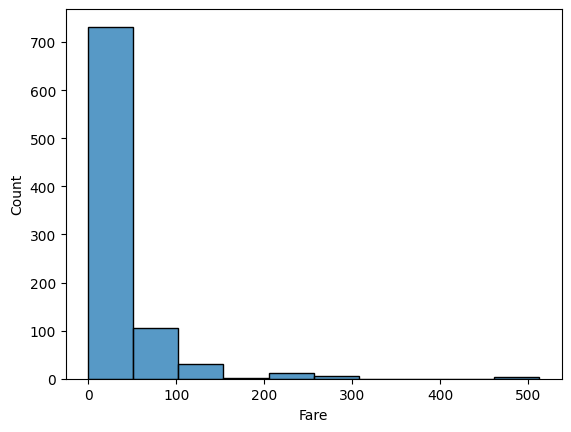

In [16]:
sns.histplot( data=ds , x="Fare" , bins=10 )